In [110]:
!vimr 2024-04.txt

In [155]:
import numpy as np
from itertools import product

data =  """MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX"""

with open('2024-04.txt', 'r') as f:
    data = f.read()

data = np.array([list(l) for l in data.splitlines()])

In [156]:
np.set_printoptions(linewidth=1000, suppress=False, threshold=np.inf)
S = data.shape[0]


In [157]:
fdata = np.vstack([
    np.full((3, S+6),'.'),
    np.hstack([np.full((S,3),'.'), data, np.full( (S, 3), '.')]),
    np.full((3, S+6),'.')
])
fdata

array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'

In [162]:
count = 0
for i,j in product(range(3,S+3), range(3,S+3)):
    if fdata[i,j] != 'X':
        continue
    for da,db in [(-1,-1),(-1,0), (-1,1),
                  (0 ,-1)    ,     (0 ,1),
                  (1 ,-1),( 1,0), (1,1)]:  # [(a,b) for (a,b) in product([-1,0,1],[-1,0,1]) if (a,b) != (0,0)]
        if (fdata[i+da,j+db] == 'M') and\
           (fdata[i+2*da,j+2*db] == 'A') and\
           (fdata[i+3*da,j+3*db] == 'S'):
            count +=1
        
count

2427

431
220
425
205
0
202
396
204
344


2427

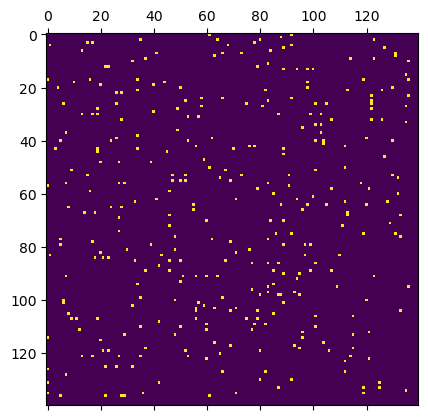

In [158]:

ns = 0
for i,j in product([-1,0,1],[-1,0,1]):
    mask = np.full_like(data, True, dtype=bool)
    for k,l in enumerate('XMAS'):
        mask = mask & (fdata[k*i+3:S+3+k*i,k*j+3:S+3+k*j] == l)
    ss = mask.sum()
    print(ss)
    
    ns += ss
    


import matplotlib.pyplot as plt


plt.matshow(mask)
ns

In [159]:
list(enumerate('MAS', -1))

[(-1, 'M'), (0, 'A'), (1, 'S')]

In [160]:

data
count = 0
for i,j in product(range(3,S+3), range(3,S+3)):
    if fdata[i,j] != 'A':
        continue
    sa = set([fdata[i-1,j-1], fdata[i+1,j+1]])
    sb = set([fdata[i+1,j-1], fdata[i-1,j+1]])
    if sa == sb == {'M','S'}:
        count +=1
        
    
    
count

1900